In [27]:
import msgspec
import pandas as pd

pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.max_rows', 500)

In [28]:
!ls

aita_analysis       reddit              submissions.parquet
aita_analysis-1     reddit_data.ipynb   work.ipynb


In [29]:
pre_df = pd.read_parquet("submissions.parquet")

In [35]:
pre_df

,link_flair_text,num_comments,over_18,score,url,selftext,title,id,edited,is_self,permalink,downs,ups,created
0,not the asshole,1,False,2,http://www.reddit.com/r/AmItheAsshole/comments...,I work in an office that requires me to wear a...,AItA: I like air conditioning and my coworkers...,1fy0bx,0,True,/r/AmItheAsshole/comments/1fy0bx/aita_i_like_a...,0,2,NaN
1,too close to call,9,False,62,http://www.reddit.com/r/AmItheAsshole/comments...,I have been on a parking structure project for...,[AITA] Construction worker here,1ytr72,0,True,/r/AmItheAsshole/comments/1ytr72/aita_construc...,0,62,1393275159
2,asshole,13,False,47,http://www.reddit.com/r/AmItheAsshole/comments...,[Here is the post in question](http://www.redd...,[AITA] I wrote an explanation in TIL and came ...,1ytxov,0,True,/r/AmItheAsshole/comments/1ytxov/aita_i_wrote_...,0,47,1393278651
3,asshole,27,False,140,http://www.reddit.com/r/AmItheAsshole/comments...,"My parents are diabetic, morbidly obese, and a...",[AITA] Threw my parent's donuts away,1yu29c,1393290576,True,/r/AmItheAsshole/comments/1yu29c/aita_threw_my...,0,140,1393281184
4,nothing happened,7,False,44,http://www.reddit.com/r/AmItheAsshole/comments...,"Relevant Facts:\n\n1) It was a crowded bar, th...",[AITA] I Put My Empty Beer on a Bar Table,1yu41e,0,True,/r/AmItheAsshole/comments/1yu41e/aita_i_put_my...,0,44,1393282238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178380,POO Mode Activated 💩,1,False,1,https://www.reddit.com/r/AmItheAsshole/comment...,We have an elderly neighbor and while he seems...,AITA for not helping neighbor move or pack?,18uzqsx,0,True,/r/AmItheAsshole/comments/18uzqsx/aita_for_not...,0,1,1703998356
2178381,POO Mode Activated 💩,2,False,1,https://www.reddit.com/r/AmItheAsshole/comment...,deleted,AITA for getting annoyed at my sister for gett...,18uzsfl,1704028481,True,/r/AmItheAsshole/comments/18uzsfl/aita_for_get...,0,1,1703998497
2178382,POO Mode Activated 💩,2,False,1694,https://www.reddit.com/r/AmItheAsshole/comment...,AITA here?\n\nMy SO and I started a business a...,AITA for quitting because I was called an empl...,18uztpk,0,True,/r/AmItheAsshole/comments/18uztpk/aita_for_qui...,0,1694,1703998609
2178383,POO Mode Activated 💩,1,False,1,https://www.reddit.com/r/AmItheAsshole/comment...,[removed],AITA for being upset I’m getting left on NYE?,18uzulx,0,True,/r/AmItheAsshole/comments/18uzulx/aita_for_bei...,0,1,1703998701


In [36]:
pre_df.link_flair_text.unique()

array(['not the asshole', 'too close to call', 'asshole',
       'nothing happened', 'everyone sucks', None, 'META', 'inconclusive',
       'kind of a dick move', 'not quite the asshole', 'near asshole',
       'all assholes!', '"near" asshole', 'Kids being kids!',
       '(minor) asshole', 'Roadrage', 'meh', 'teenager',
       'More info needed', 'no assholes - yet', 'asshole - i guess',
       'unreasonable', 'not clear', 'not enough info', "it's complicated",
       'not really', 'dingus', 'troll', 'cunt', 'asshole, kinda',
       'OP trolling', '90% perfectly ok ', 'kind of', 'No consensus.',
       'too long to read', 'obvious asshole', 'no results',
       'chump, not asshole', 'no assholes here', 'not irrational',
       'evasive asshole', 'OP Trolling', 'affair meddler', 'auto-asshole',
       'Shut Up.', 'OP bullshitting', 'teenage drama', '"overreact-hole"',
       '1/10th asshole', 'nobody cares', "asshole's friend", 'Naïve',
       'not THE asshole', 'Shit Post', 'sam is an

In [37]:
pre_df.groupby(pre_df.link_flair_text).size().sort_values(ascending=False).to_frame().reset_index().head(100)

,link_flair_text,0
0,Not the A-hole,425654
1,Asshole,117227
2,No A-holes here,50298
3,Everyone Sucks,32167
4,Not enough info,15703
5,UPDATE,7408
6,TL;DR,5380
7,not the a-hole,4768
8,POO Mode Activated 💩,4498
9,asshole,1803


In [38]:
count_flair= pre_df.groupby(pre_df.link_flair_text).size().sort_values(ascending=False).to_frame().reset_index()
count_flair.loc[count_flair[0]>=100].link_flair_text.to_list()

['Not the A-hole',
 'Asshole',
 'No A-holes here',
 'Everyone Sucks',
 'Not enough info',
 'UPDATE',
 'TL;DR',
 'not the a-hole',
 'POO Mode Activated 💩',
 'asshole',
 '',
 'META',
 'Shitpost',
 'not the asshole',
 'no a--holes here',
 'everyone sucks',
 'too close to call',
 'not enough info']

https://www.reddit.com/r/AmItheAsshole/wiki/faq/#wiki_how_do_i_get_user_flair.3F

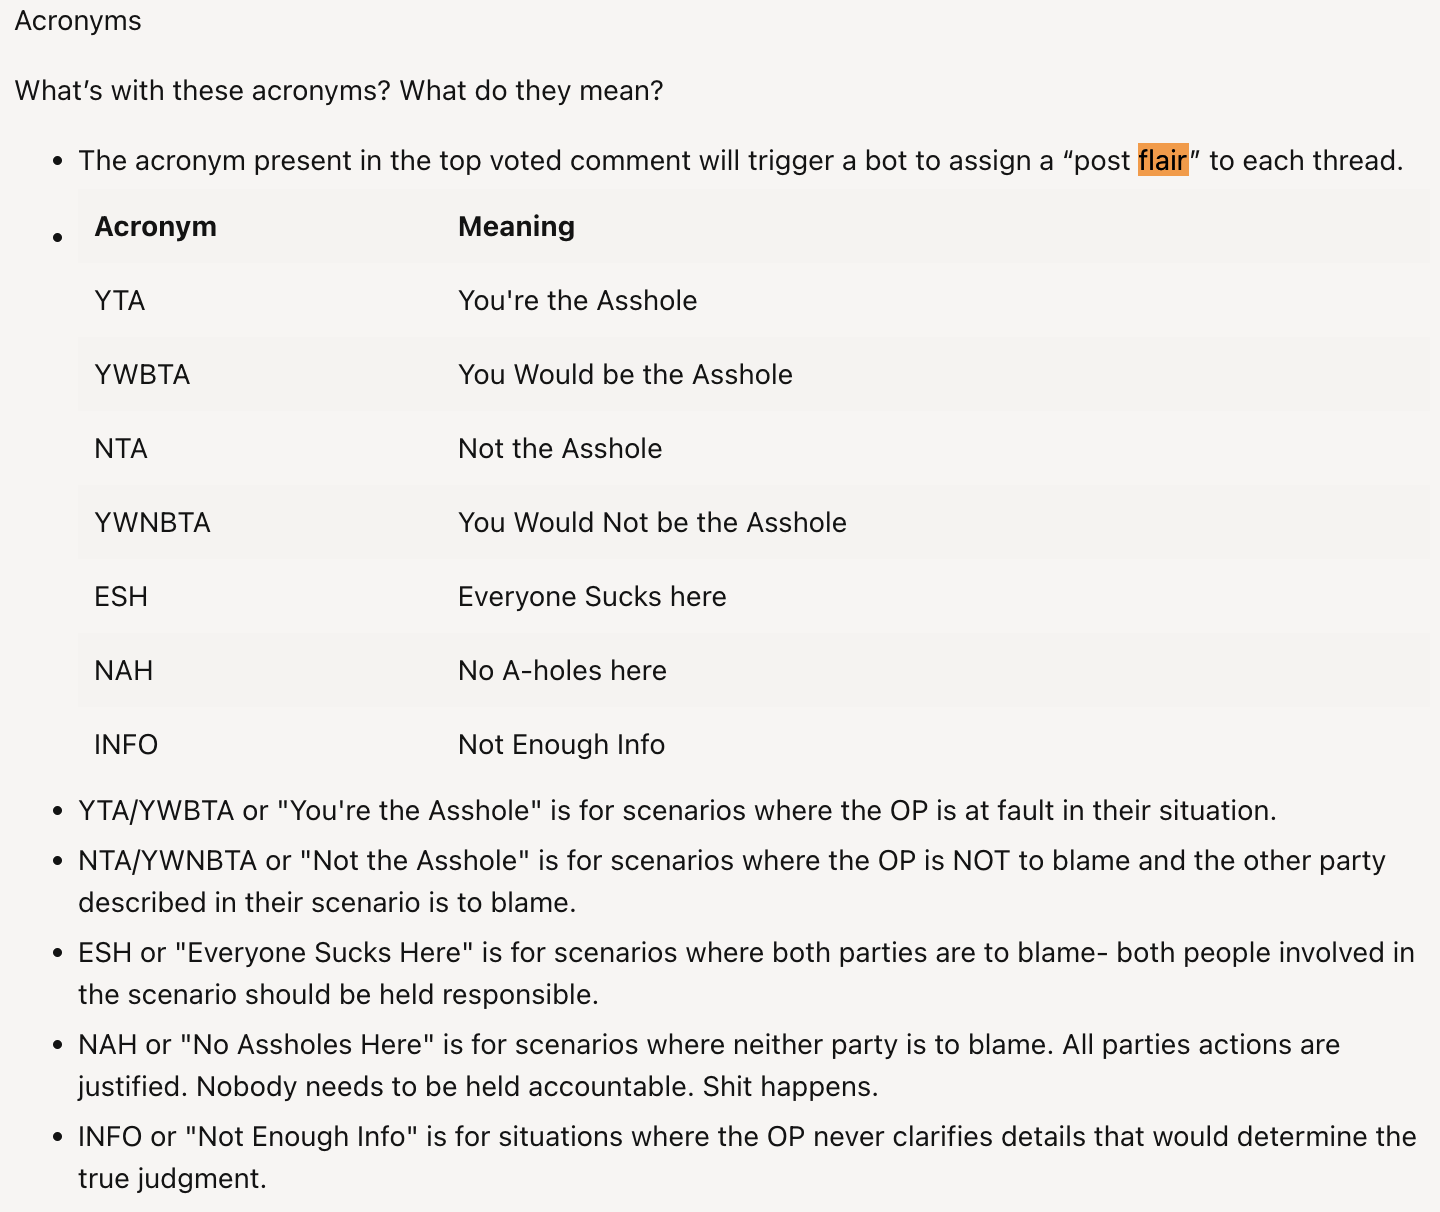


In [42]:
flair_list = [
 'Not the A-hole',
 'Asshole',
 'No A-holes here',
 'Everyone Sucks',
 'Not enough info',
 # 'UPDATE',
 # 'TL;DR',
 'not the a-hole',
 # 'POO Mode Activated 💩',
 'asshole',
 # '',
 # 'META',
 'Shitpost',
 'not the asshole',
 'no a--holes here',
 'everyone sucks',
 'too close to call',
 'not enough info']

In [15]:
pre_df.columns

Index(['link_flair_text', 'num_comments', 'over_18', 'score', 'url',
       'selftext', 'title', 'id', 'edited', 'is_self', 'permalink', 'downs',
       'ups', 'created'],
      dtype='object')

In [22]:
pre_df.num_comments.describe()

count   2178385
mean         39
std         218
min           0
25%           1
50%           5
75%          20
max       99993
Name: num_comments, dtype: float64

array([[<Axes: title={'center': 'num_comments'}>]], dtype=object)

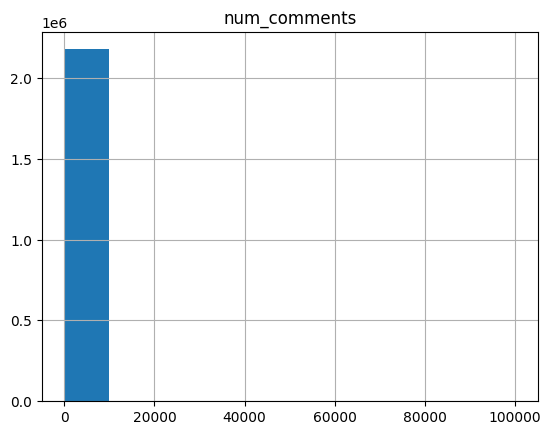

In [18]:
pre_df.hist(column='num_comments')

# cleansed to meaningful flair

In [45]:
df = pre_df.loc[pre_df.link_flair_text.isin(flair_list)]

In [46]:
df

,link_flair_text,num_comments,over_18,score,url,selftext,title,id,edited,is_self,permalink,downs,ups,created
0,not the asshole,1,False,2,http://www.reddit.com/r/AmItheAsshole/comments...,I work in an office that requires me to wear a...,AItA: I like air conditioning and my coworkers...,1fy0bx,0,True,/r/AmItheAsshole/comments/1fy0bx/aita_i_like_a...,0,2,NaN
1,too close to call,9,False,62,http://www.reddit.com/r/AmItheAsshole/comments...,I have been on a parking structure project for...,[AITA] Construction worker here,1ytr72,0,True,/r/AmItheAsshole/comments/1ytr72/aita_construc...,0,62,1393275159
2,asshole,13,False,47,http://www.reddit.com/r/AmItheAsshole/comments...,[Here is the post in question](http://www.redd...,[AITA] I wrote an explanation in TIL and came ...,1ytxov,0,True,/r/AmItheAsshole/comments/1ytxov/aita_i_wrote_...,0,47,1393278651
3,asshole,27,False,140,http://www.reddit.com/r/AmItheAsshole/comments...,"My parents are diabetic, morbidly obese, and a...",[AITA] Threw my parent's donuts away,1yu29c,1393290576,True,/r/AmItheAsshole/comments/1yu29c/aita_threw_my...,0,140,1393281184
5,not the asshole,15,False,72,http://www.reddit.com/r/AmItheAsshole/comments...,I was four.,I told a goth girl she looked like a clown.,1yu8hi,0,True,/r/AmItheAsshole/comments/1yu8hi/i_told_a_goth...,0,72,1393284677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171908,Not the A-hole,14,False,117,https://www.reddit.com/r/AmItheAsshole/comment...,"f(17), I'm the oldest child with 1 younger sis...",AITA- for ignoring my sister because she snitc...,18pnieb,0,True,/r/AmItheAsshole/comments/18pnieb/aita_for_ign...,0,117,1703392415
2171916,Not the A-hole,16,False,577,https://www.reddit.com/r/AmItheAsshole/comment...,"About a year and a half ago, my (32F) mom (60F...",AITA for telling my mom her dog needs training...,18pno1q,0,True,/r/AmItheAsshole/comments/18pno1q/aita_for_tel...,0,577,1703392986
2171917,Not the A-hole,7,False,287,https://www.reddit.com/r/AmItheAsshole/comment...,"Throughout the days before my b-day, I was thi...",AITA... I just wanted some peace and quiet for...,18pnoev,0,True,/r/AmItheAsshole/comments/18pnoev/aita_i_just_...,0,287,1703393025
2171918,Not the A-hole,34,False,1088,https://www.reddit.com/r/AmItheAsshole/comment...,\n\nEdit: Boyfriend insist I add that we've b...,AITA for yelling at my boyfriend for eating my...,18pnp6m,0,True,/r/AmItheAsshole/comments/18pnp6m/aita_for_yel...,0,1088,1703393101


In [49]:
df.selftext[0]

"I work in an office that requires me to wear a suit all the time.  I work more hours than everyone.  Show up first, leave late, etc.  The office has an air conditioning system which I turn on and set to 72º every morning.  We don't run it at night.  It's in New England and humid as fuck, so when you come in early, the place is dripping wet making it easy to feel uncomfortable at 70º when you always have to wear a coat and long pants.  But after an hour of dehumidifying, 72º is fine.  A co-worker of mine who only comes in once a week (and usually late) comes in dressed in designer clothes fit for going to the beach on a hot day and announces that it's too cold in here.  I can't wear less and be dressed appropriately, and management isn't going to take the risk of criticizing a woman's fashion choices.   I told her to wear a freaking sweater and left the AC on.  *Am I the Asshole?*\n\n**TL;DR: I adjust the AC to make it comfortable in work-appropriate clothes.  My co-worker wants the wh

In [57]:
pd.options.display.max_colwidth = 10000

In [58]:
df[["selftext"]].head(100)

,selftext
0,"I work in an office that requires me to wear a suit all the time. I work more hours than everyone. Show up first, leave late, etc. The office has an air conditioning system which I turn on and set to 72º every morning. We don't run it at night. It's in New England and humid as fuck, so when you come in early, the place is dripping wet making it easy to feel uncomfortable at 70º when you always have to wear a coat and long pants. But after an hour of dehumidifying, 72º is fine. A co-worker of mine who only comes in once a week (and usually late) comes in dressed in designer clothes fit for going to the beach on a hot day and announces that it's too cold in here. I can't wear less and be dressed appropriately, and management isn't going to take the risk of criticizing a woman's fashion choices. I told her to wear a freaking sweater and left the AC on. *Am I the Asshole?*\n\n**TL;DR: I adjust the AC to make it comfortable in work-appropriate clothes. My co-worker wants the whole office hotter so she can dress like she's outside in the summer.**"
1,"I have been on a parking structure project for about 1 year and 3 months. People keep asking me when it will be completed and why it's taking so long. I am merely a foreman(assistant) on this job. I am very fed up with these questions and not completing it as well. I have started to vary my answer to 3 months plus a year for other new construction but that doesn't concern the opening as much. Or my other answers are laugh it off or get pissed, but don't give a direct answer. Am I an asshole for being so bitter over this project? \n\nIt's hard writing unbiased."
2,"[Here is the post in question](http://www.reddit.com/r/todayilearned/comments/1y40m9/til_a_circle_of_infinite_circumference_is_a/cfhhajs?context=3)\n\nIt seems like I came off as an asshole. What can I do in the future to avoid this? I thought I was just randomly explaining something, which seems common on Reddit.\n\nI definitely shouldn't have said ""Sorry for trying to help"" - That was pretty immature and rude. \n\nAm I the asshole here?\n\nI wrote as little as possible to skew perspective as little as possible."
3,"My parents are diabetic, morbidly obese, and addicted to food. \n\nI'm the same, minus the diabetes. I've been trying for a while to eat healthily and lose weight. So have they, but yet every time they go to the store, they bring home junk food. \n\nI understand that it's hard for them, but it's also hard to stay on track with my healthier lifestyle when there's junk food all around me. Plus, they're getting older, so it is crucial for them to get healthy now.\n\n\nA few weeks ago, they brought home 4 bags of donuts, and I emptied each pack into the trash. Am I an asshole for this?\n\n**Edit:** I love all the responses. Got one ""no"", one ""maybe"", and one ""yes"". I agree with all of you.\n\n**Edit 2:** You guys are right--I'm the asshole."
5,I was four.
6,http://www.reddit.com/r/HIMYM/comments/1vvfkq/maybe_its_not_the_mother_who_died/cewgr1b?context=3\n\nhttp://www.reddit.com/r/HIMYM/comments/1wcb5w/i_know_i_know_enough_with_the_dead_mother/cf0rivn?context=3
8,
9,"I love the musical *Les Miserables*. A coworker of mine said that they didn't like it. I asked why and they said, among other things, that ""it's not a musical, it's an opera.""\n\nNow, I happen to be an opera singer. I told them adamantly that it is NOT an opera. There are a number of things that make this true, but if you can take my word for it- and I hope you can- it's not a matter of opinion whether a mainstream musical is an opera or not. It is a musical, period.\n\nMy coworker thought otherwise. ""My boyfriend writes musicals and he agrees with me"" was the extent of her argument. Well, he may well write musicals but that doesn't mean he knows anything about opera. You might as well ask a jazz pianist to tell you about Beethoven- it's not the same area of expertise even if it's related. I told her ""You're entitled to your opin

In [59]:
df["selftext"]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [61]:
df.describe()

,num_comments,score,edited,downs,ups,created
count,649449,649449,649449,83028,83146,82276
mean,92,411,414551989,0,234,1687014613
std,337,1982,705141341,0,1265,32368392
min,0,0,0,0,0,1393275159
25%,11,3,0,0,1,1685864302
50%,21,8,0,0,2,1691279392
75%,44,37,1547419167,0,13,1696458050
max,15974,81021,1703357717,0,43066,1703393574


array([[<Axes: title={'center': 'num_comments'}>]], dtype=object)

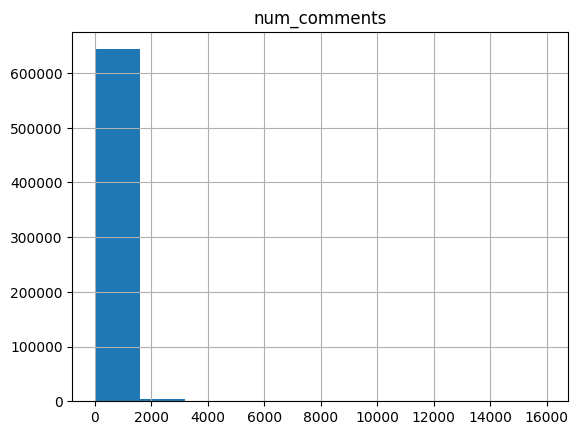

In [62]:
df.hist(column='num_comments')

array([[<Axes: title={'center': 'num_comments'}>]], dtype=object)

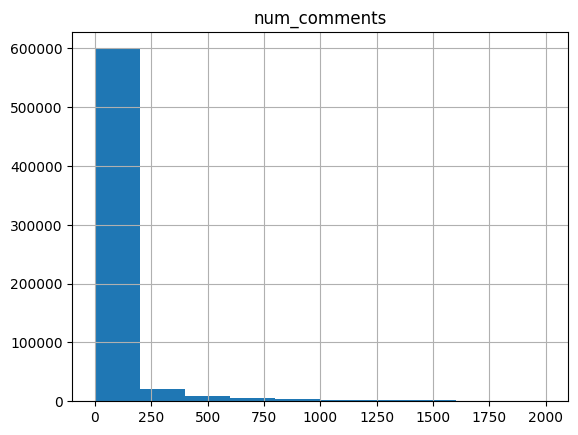

In [64]:
df.loc[df.num_comments<=2000].hist(column='num_comments')

array([[<Axes: title={'center': 'num_comments'}>]], dtype=object)

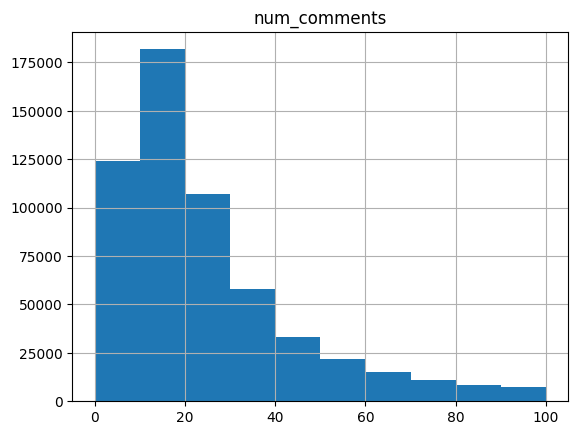

In [67]:
df.loc[df.num_comments<=100].hist(column='num_comments')